In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
raw_df = pd.read_csv("Reports.csv")
raw_df.head()

,DateTime,18151 - Energy charged,18151 - Energy consumed driving,18151 - Energy driven,18151 - Energy idled,18151 - Energy used in service,18151 - Energy used not in service,18151 - Energy regenerated driving,18151 - Energy used,18151 - SOC charged,...,23120 - SOC used driving,23120 - SOC used idling,23120 - SOC used in service,23120 - SOC used not in service,23120 - Time charging,23120 - Time driving consuming,23120 - Time driving,23120 - Time idling,23120 - Time in service,23120 - Time not in service
0,2024-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.6,NaN,NaN,0.188793,0.299911,0.014362,0.314249,NaN
1,2024-10-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.2,39.6,NaN,0.047269,0.050325,0.090740,0.109908,0.030783
2,2024-10-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.8,0.4,0.816760,0.021357,0.021357,0.021312,0.038268,0.004097
3,2024-10-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.2,0.8,0.105776,0.026197,0.030919,0.819411,0.324300,0.525639
4,2024-10-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.8,1.6,NaN,0.185557,0.227226,0.772923,0.340528,0.659070


In [3]:
raw_df.describe()

,18151 - Energy charged,18151 - Energy consumed driving,18151 - Energy driven,18151 - Energy idled,18151 - Energy used in service,18151 - Energy used not in service,18151 - Energy regenerated driving,18151 - Energy used,18151 - SOC charged,18151 - SOC used,...,23120 - SOC used driving,23120 - SOC used idling,23120 - SOC used in service,23120 - SOC used not in service,23120 - Time charging,23120 - Time driving consuming,23120 - Time driving,23120 - Time idling,23120 - Time in service,23120 - Time not in service
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,448.000000,480.000000,445.000000,92.000000,286.000000,469.000000,469.000000,502.000000,476.000000,261.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.276160,0.252142,7.456180,49.404348,0.181924,0.292748,0.439189,0.386768,0.779569,0.114047
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.008408,0.292518,9.593207,42.260006,0.218816,0.120758,0.184401,0.189784,0.308705,0.226487
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010024,0.000002,0.148878,0.400000,0.000240,0.004951,0.005785,0.000240,0.000080,0.000217
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.593083,0.085063,4.400000,2.300000,0.080972,0.261383,0.409417,0.303427,0.828880,0.004013
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.001544,0.150061,6.158569,48.600000,0.127736,0.311834,0.460808,0.409222,0.887785,0.010300
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.762626,0.280605,7.600000,97.200000,0.154115,0.365183,0.551764,0.480174,0.984721,0.062225
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.834416,1.948825,97.200000,98.400000,1.000000,0.525354,0.722547,0.934903,1.000000,0.898063


In [4]:
import pandas as pd

# Example: Assume `df` is your DataFrame with columns like "123 - attribute1", "456 - attribute2", etc.
# First, extract the unique bus IDs from the column names
bus_ids = {col.split(" - ")[0] for col in raw_df.columns}

# Create a dictionary to hold DataFrames for each bus
bus_dfs = {}

# Loop through each unique bus ID
for bus_id in bus_ids:
     # Filter columns for the specific bus ID and add the "DateTime" column
    bus_dfs[bus_id] = raw_df[['DateTime'] + raw_df.filter(regex=f"^{bus_id} -").columns.tolist()]

    # Optionally rename columns to remove the bus ID prefix
    bus_dfs[bus_id].columns = ['DateTime'] + [col.split(" - ")[1] for col in bus_dfs[bus_id].columns[1:]]
# Now `bus_dfs` is a dictionary where each key is a bus ID and each value is a DataFrame for that bus


In [5]:
del bus_dfs['DateTime']
bus_dfs.keys()

dict_keys(['23108', '23110', '22106', '23116', '23118', '22101', '22110', '23111', '22102', '23107', '18152', '23119', '23112', '18151', '23104', '18153', '22104', '22107', '22108', '22109', '23101', '23102', '22103', '22105', '22111', '23117', '23105', '23113', '23120', '23106', '23103', '23109', '23115', '23114'])

In [6]:
print(bus_dfs['23106'].columns)

Index(['DateTime', 'Cumulative Energy Used', 'Energy charged',
       'Energy consumed driving', 'Energy driven', 'Energy idled',
       'Energy used in service', 'Energy used not in service',
       'Energy regenerated driving', 'Energy used', 'SOC charged', 'SOC used',
       'SOC used driving', 'SOC used idling', 'SOC used in service',
       'SOC used not in service', 'Time charging', 'Time driving consuming',
       'Time driving', 'Time idling', 'Time in service',
       'Time not in service'],
      dtype='object')


In [7]:
# Dictionary to store average energy charged per hour of the day for each bus
average_energy_per_hour = {}

for bus_id, bus_df in bus_dfs.items():
    if 'Energy charged' in bus_df.columns:
        # Fill missing values in 'Energy charged' with zero
        bus_dfs[bus_id]['Energy charged'] = bus_df['Energy charged'].fillna(0)
        
        # Extract the hour from the DateTime column
        bus_dfs[bus_id]['Hour'] = pd.to_datetime(bus_df['DateTime']).dt.hour
        
        # Group by hour and calculate the average 'Energy charged' for each hour across all days
        hourly_avg = bus_df.groupby('Hour')['Energy charged'].mean()
        
        # Save the average values in a Series, indexed by hour (0-23)
        average_energy_per_hour[bus_id] = hourly_avg

# `average_energy_per_hour` now contains a Series for each bus with the average energy charged for each hour (0-23)

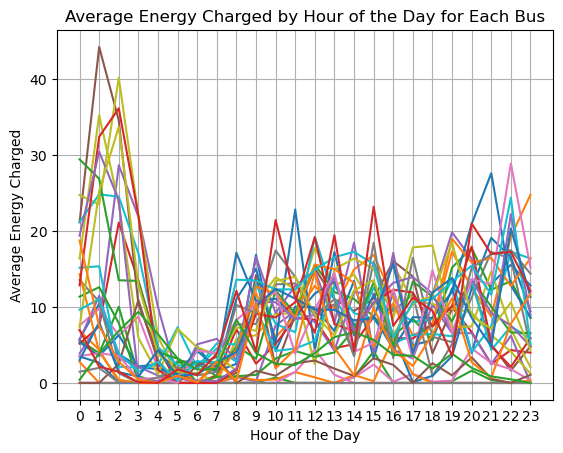

In [8]:
# Loop through each bus's hourly averages in the dictionary
for bus_id, hourly_avg in average_energy_per_hour.items():
    # Plot the average energy charged for each hour (0-23)
    plt.plot(hourly_avg.index, hourly_avg.values, label=f'Bus {bus_id}')

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Charged')
plt.title('Average Energy Charged by Hour of the Day for Each Bus')
plt.xticks(range(0, 24))  # Set x-axis ticks to show each hour from 0 to 23
plt.grid(True)
plt.show()

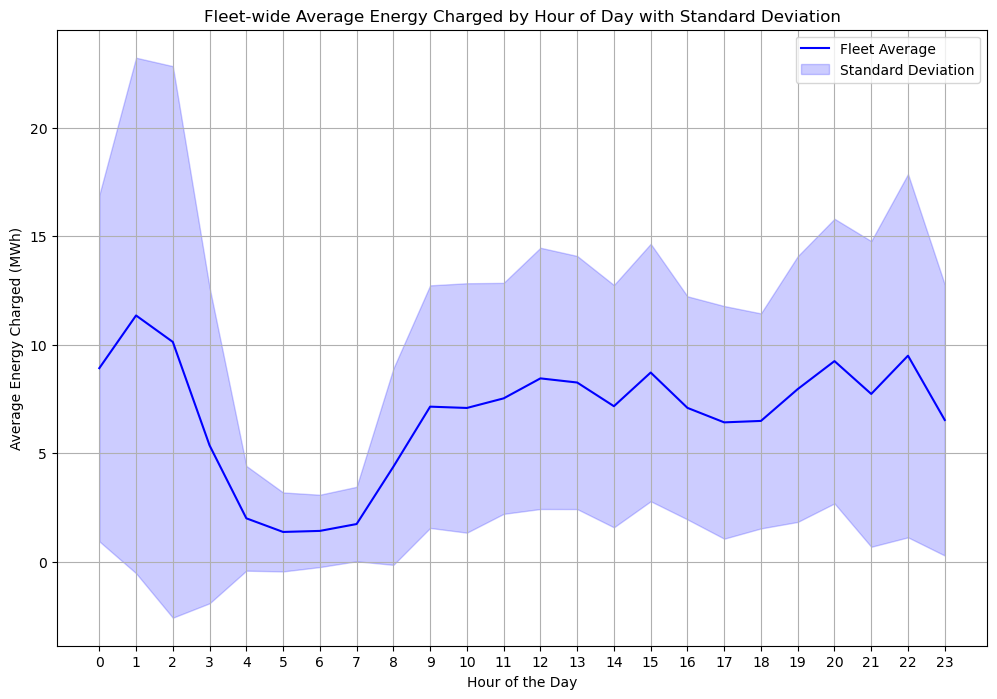

In [9]:
# Combine the hourly averages for all buses into a DataFrame for easy calculation
hourly_data = pd.DataFrame(average_energy_per_hour)

# Calculate the mean and standard deviation across all buses for each hour (0-23)
fleet_mean = hourly_data.mean(axis=1)
fleet_std = hourly_data.std(axis=1)

# Plot the average energy charged by hour with a shaded region for standard deviation
plt.figure(figsize=(12, 8))
plt.plot(fleet_mean.index, fleet_mean.values, label='Fleet Average', color='blue')
plt.fill_between(fleet_mean.index, fleet_mean - fleet_std, fleet_mean + fleet_std, 
                 color='blue', alpha=0.2, label='Standard Deviation')

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Charged (MWh)')
plt.title('Fleet-wide Average Energy Charged by Hour of Day with Standard Deviation')
plt.legend()
plt.xticks(range(0, 24))  # Set x-axis ticks to show each hour from 0 to 23
plt.grid(True)
plt.show()


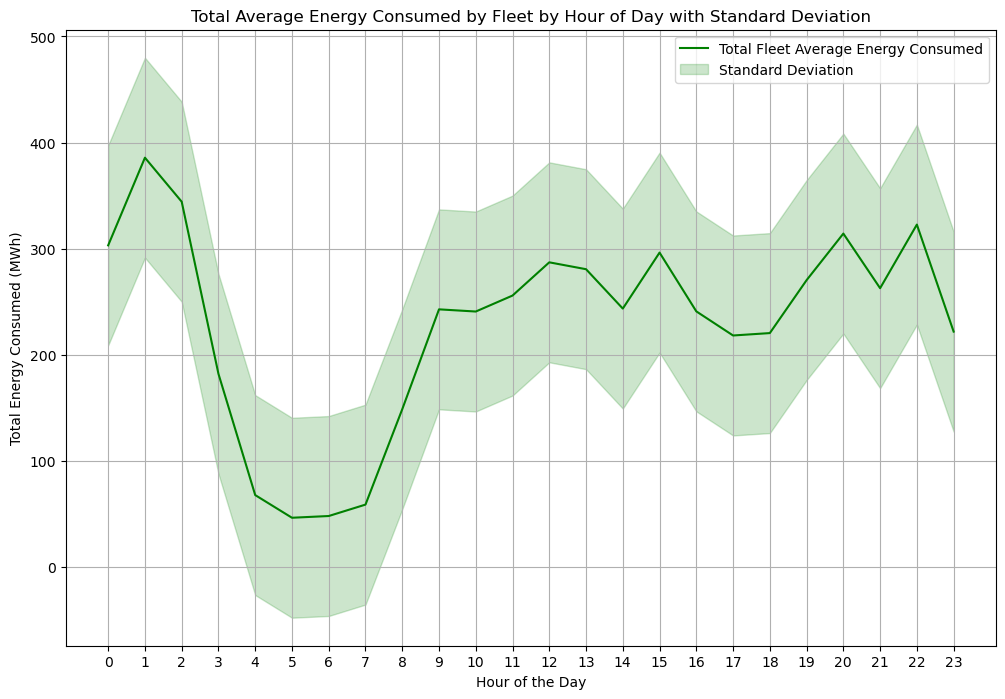

In [10]:

# Calculate the total energy consumed across all buses for each hour
total_energy = hourly_data.sum(axis=1)

# Calculate the mean and standard deviation for the total energy consumed
fleet_mean = total_energy.mean()  # This is the total average energy consumed by hour
fleet_std = total_energy.std()  # Standard deviation for the total energy consumed by hour

# Plot the total average energy consumed by hour with a shaded region for standard deviation
plt.figure(figsize=(12, 8))
plt.plot(total_energy.index, total_energy.values, label='Total Fleet Average Energy Consumed', color='green')
plt.fill_between(total_energy.index, total_energy - fleet_std, total_energy + fleet_std, 
                 color='green', alpha=0.2, label='Standard Deviation')

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Total Energy Consumed (MWh)')
plt.title('Total Average Energy Consumed by Fleet by Hour of Day with Standard Deviation')
plt.legend()
plt.xticks(range(0, 24))  # Set x-axis ticks to show each hour from 0 to 23
plt.grid(True)
plt.show()
